# Predict IMDB movie rating
The series of code is used to build a model to predict a movie's imdb rating score.

Dependent Variable: imdb_score

Data Source: https://github.com/sundeepblue/movie_rating_prediction/blob/master/movie_metadata.csv

## Part 1: EDA
EDA is used to understand dataset better with data visualization skills and provide insights for following data preprocessing, feature engineering, and modeling.

# SETUP 

In [2]:
# load libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# read dataset
df_path = 'https://raw.githubusercontent.com/sundeepblue/movie_rating_prediction/master/movie_metadata.csv'
df = pd.read_csv(df_path)
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
df.shape

(5043, 28)

# EDA

1. check dataset structure and identify variables' types
2. check variable distribution
3. check the relationship between dependent variable and independent variables
4. check correlation between variables

In [9]:
def count_dtypes(df):
    cate_vars = df.dtypes[df.dtypes == 'object'].index.tolist()
    nume_vars = df.dtypes[df.dtypes != 'object'].index.tolist()
    print("Categorical varialbes:", sum(df.dtypes == 'object'))
    print("Numerical varialbes:", sum(df.dtypes == 'int64') + sum(df.dtypes == 'float64'))
    return cate_vars, nume_vars
cate_vars, nume_vars = count_dtypes(df.drop('imdb_score', axis = 1))

Categorical varialbes: 12
Numerical varialbes: 15


In [10]:
# Generate descriptive statistics
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [13]:
# count unique values for categorical variables
df[cate_vars].nunique()
# categorical variables contains too many unique values except color,it is a challenge to use one-hot encoding for these variables
# before encoding, it is necessary to recode these variables
# movie_imdb_link will not be choosed as a feature, but it can help to get the movie's imdb_number

color                 2
director_name      2398
actor_2_name       3032
genres              914
actor_1_name       2097
movie_title        4917
actor_3_name       3521
plot_keywords      4760
movie_imdb_link    4919
language             47
country              65
content_rating       18
dtype: int64

<AxesSubplot:xlabel='imdb_score', ylabel='Count'>

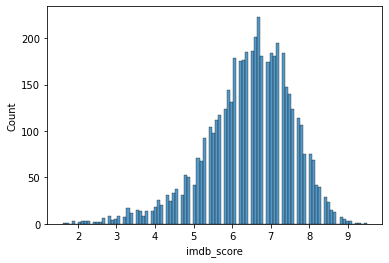

In [14]:
# check dependent variable's distribution via boxplopt 
sns.histplot(x="imdb_score",bins = 100, data=df)
# all values are in the range(0,10), so there is no outlier in dependent variable
# its distribution is close to normal distribution

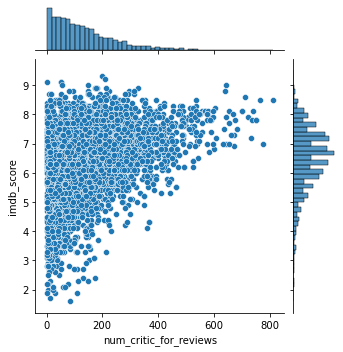

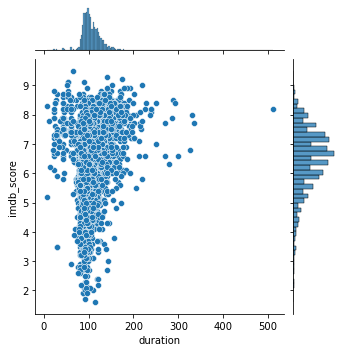

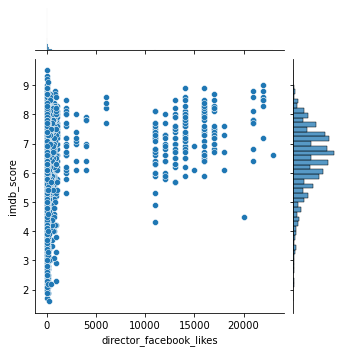

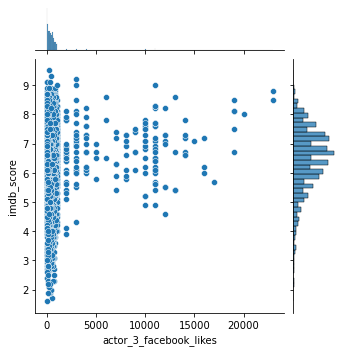

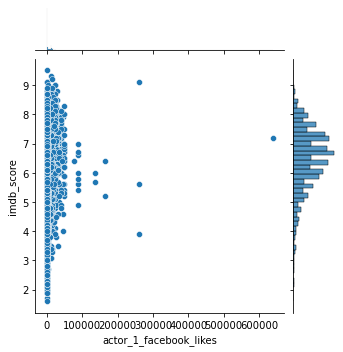

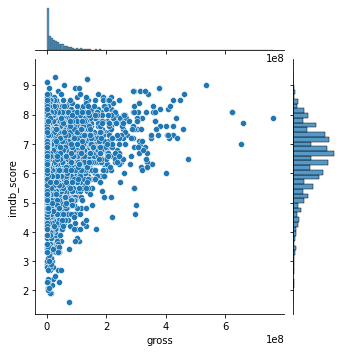

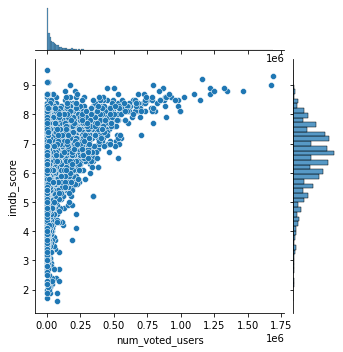

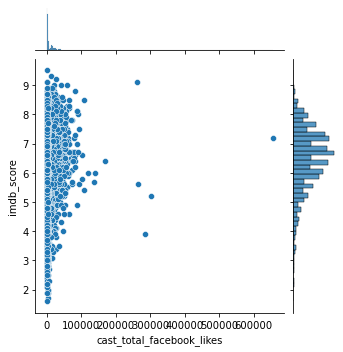

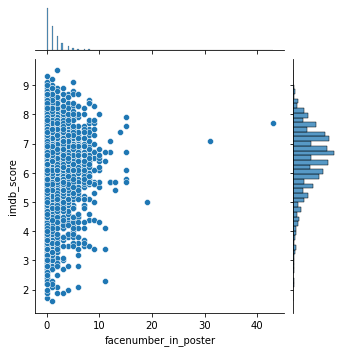

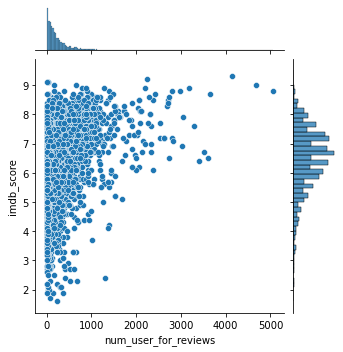

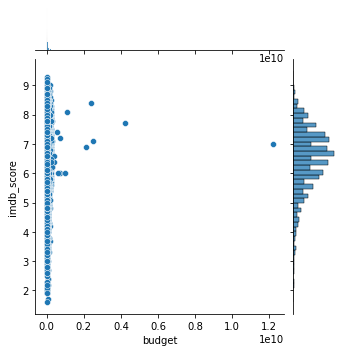

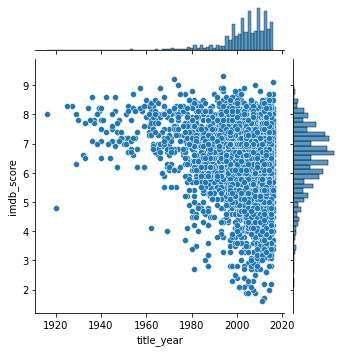

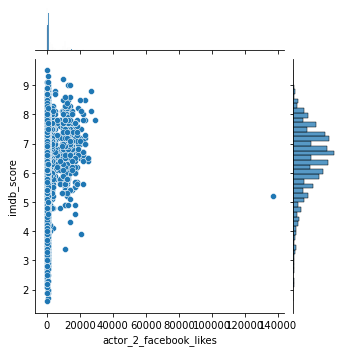

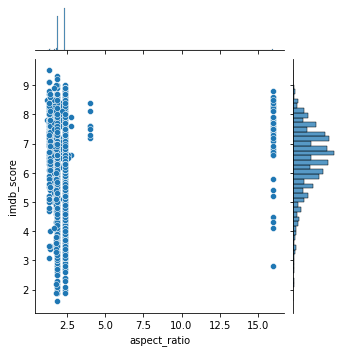

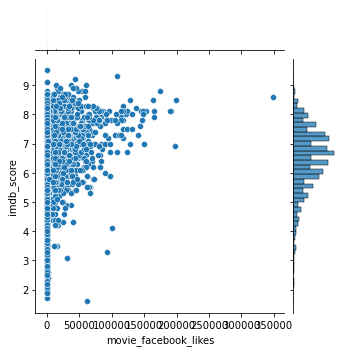

In [7]:
# For numberic variable, use scatter plot to check relationship between them and imdb_score
for col in nume_vars:
    sns.jointplot(x=col, y="imdb_score", data=df, height = 5)
    plt.show()

# the distribution of dependent variable is closely to bell curve
# There are some outliers in columns(duration, actor_1_facebook_likes, cast_total_facebook_likes, facenumber_in_poster, budget, actor_2_fackbook_like, moive_facebook_likes)
# only the distribution of duration is close to normal distribution, so implement Box-Cox power transformation before standardization
# the higher rum_critic_reviews, the less probability of getting a low imdb_score
# the higher gross, the less probability of getting a low imdb_score
# the higher num_voted_users, the less probability of getting a low imdb_score
# the higher rum_critic_reviews, the less probability of getting a low imdb_score
# the higher rum_critic_for_reviews, the less probability of getting a low imdb_score
# the higher title, the higher probability of getting a low imdb_score
# the higher moive_facbook_likes, the less probability of getting a low imdb_score

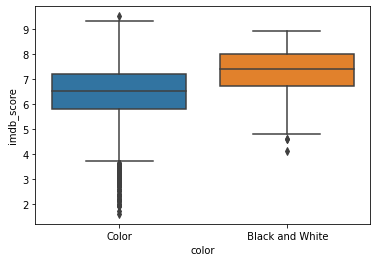

In [8]:
# For categorical variables, use boxplot to check relationship between them and imdb_score
sns.boxplot(x = 'color', y="imdb_score", data=df)
plt.show()

# generally, imdb_score of BW moive is higher than the score of color movie

<AxesSubplot:>

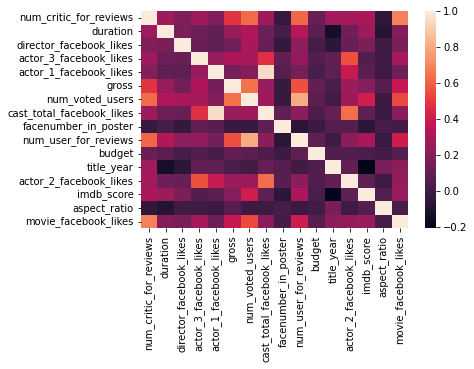

In [27]:
# generate correlation heatmap
sns.heatmap(df.corr())
# no variable has a high correlation with imdb_score
# there are strong correlation between variables, so model may meet multicollinearity problem

# Conclusion
## Dependent variable
1. all values are in the range(0,10), so there is no outlier in dependent variable
2. the distribution of dependent variable is closely to bell curve

## Variable Type(excluing dependent variable)
1. there are 12 numeric variables and 15 categorical variables

## Numeric Variables
1. there are some outliers in columns(duration, actor_1_facebook_likes, cast_total_facebook_likes, facenumber_in_poster, budget, actor_2_fackbook_like, moive_facebook_likes)
2. variables were measured on different scales, so standardization is necessary
3. the higher rum_critic_reviews, the less probability of getting a low imdb_score
4. the higher gross, the less probability of getting a low imdb_score
5. the higher num_voted_users, the less probability of getting a low imdb_score
6. the higher rum_critic_reviews, the less probability of getting a low imdb_score
7. the higher rum_critic_for_reviews, the less probability of getting a low imdb_score
8. the higher title, the higher probability of getting a low imdb_score
9. the higher moive_facbook_likes, the less probability of getting a low imdb_score。

## Categorical Variables
1. categorical variables contains too many unique values except color,it is a challenge to use one-hot encoding for these variables
2. before encoding, it is necessary to recode these variables
3. movie_imdb_link will not be choosed as a feature, but it can help to get the movie's imdb_number

## Correlation between Variables
1. generally, imdb_score of BW moive is higher than the score of color movie
2. no variable has a high correlation with imdb_score
3. there are strong correlation between variables, so model may meet multicollinearity problem